In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import glob
import keras
from functools import reduce
import xgboost
from xgboost import XGBClassifier

Using TensorFlow backend.
//miniconda3/envs/PTSD/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//miniconda3/envs/PTSD/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//miniconda3/envs/PTSD/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//miniconda3/envs/PTSD/lib/python3.7/site-packages/tenso

In [2]:
frame1=pd.read_csv('/Users/mahnooshsadeghi/Desktop/PTSD/PTSD Data/HR Features/HR Features_dataframe.csv')

In [3]:
frame2=pd.read_csv('/Users/mahnooshsadeghi/Desktop/PTSD/PTSD Data/Linear Accerelation Features/Linear Accerelation Features_dataframe.csv')

In [4]:
frame3=pd.read_csv('/Users/mahnooshsadeghi/Desktop/PTSD/PTSD Data/Angular Accerelation Features/Angular Accerelation Features_dataframe.csv')

In [5]:
result = pd.merge(frame1,frame2,on=["windowno","participant", 'ptsd_moment'])
frame= pd.merge(result,frame3,on=["windowno","participant", 'ptsd_moment'])

In [6]:
frame

,windowno,hrmean,hrmin,hrmax,hrsd,ptsd_moment,participant,hrrange,linaccmean,linaccmin,...,acc_zmin,acc_xmax,acc_ymax,acc_zmax,acc_xsd,acc_ysd,acc_zsd,acc_xrange,acc_yrange,acc_zrange
0,2914,66.708347,62.0,73.0,3.040741,1.0,13,11.0,0.348882,0.217425,...,6.919243,5.707777,5.640739,9.809045,1.861203,1.086771,0.560615,4.946421,5.111621,2.889802
1,2915,71.868832,64.0,80.0,4.653403,1.0,13,16.0,0.806669,0.123008,...,0.636858,7.386112,10.220847,9.885658,2.080554,3.371106,3.236376,7.046136,9.303867,9.248801
2,2917,85.688151,82.0,91.0,2.840909,1.0,13,9.0,2.514998,0.160625,...,0.495600,11.070788,10.273519,6.069301,3.759313,3.459381,1.228866,10.498574,9.588777,5.573701
3,2918,88.736465,85.0,92.0,2.299090,1.0,13,7.0,2.040820,0.148323,...,0.509965,10.192116,10.330980,9.856929,3.415119,3.281564,3.509966,9.940725,9.742007,9.346964
4,2922,84.311374,77.0,91.0,4.667418,0.0,13,14.0,2.523618,0.333024,...,0.519542,9.770737,10.041282,7.189788,3.292521,2.005847,2.147173,9.418790,7.886500,6.670246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13339,10624,62.202333,59.0,66.0,2.620253,0.0,3,7.0,0.239104,0.143193,...,2.925715,9.653421,0.675165,2.940080,0.002215,0.004644,0.002972,0.009576,0.019154,0.014365
13340,10625,63.031590,58.0,67.0,2.574690,0.0,3,9.0,0.209354,0.117786,...,2.925715,9.653421,0.679953,2.935291,0.002491,0.003073,0.002202,0.009576,0.009577,0.009577
13341,11159,110.224178,105.0,113.0,2.229094,0.0,3,8.0,2.274762,0.271582,...,0.375890,8.786720,10.477027,8.916007,3.077231,2.257510,2.534541,8.621520,8.599973,8.540117
13342,11413,95.140097,91.0,98.0,2.525024,0.0,3,7.0,1.843623,0.126336,...,0.732626,8.559271,8.956709,9.284714,2.655217,1.988869,2.832968,8.434773,6.797139,8.552088


In [7]:
frame=frame.dropna()

In [8]:
#if you want to save the file
#frame.to_csv (r'/Users/mahnooshsadeghi/Desktop/PTSD/AllFeatures_dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [9]:
frame.isnull().sum()

windowno          0
hrmean            0
hrmin             0
hrmax             0
hrsd              0
ptsd_moment       0
participant       0
hrrange           0
linaccmean        0
linaccmin         0
linaccmax         0
linaccsd          0
linear_accel_x    0
linear_accel_y    0
linear_accel_z    0
linaccrange       0
acc_x             0
acc_y             0
acc_z             0
acc_xmin          0
acc_ymin          0
acc_zmin          0
acc_xmax          0
acc_ymax          0
acc_zmax          0
acc_xsd           0
acc_ysd           0
acc_zsd           0
acc_xrange        0
acc_yrange        0
acc_zrange        0
dtype: int64

In [10]:
X= frame[['acc_x','acc_y','acc_z','acc_xmin','acc_ymin',
          'acc_zmin','acc_xmax','acc_ymax','acc_zmax','acc_xsd',
          'acc_ysd','acc_zsd','acc_xrange','acc_yrange','acc_zrange',
          'linaccmean','linaccmin','linaccmax','linaccsd', 'linear_accel_x',
          'linear_accel_y','linear_accel_z','linaccrange',
          'hrmax', 'hrmean','hrmin','hrrange','hrsd']]
#X= frameunder[['acc_x','acc_y','acc_z','linear_accel_x','linear_accel_y','linear_accel_z','linacc','hrmax', 'hrmean','hrmin','hrrange','hrsd']]
y= frame[['ptsd_moment']]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [12]:
df1 = pd.DataFrame(X_train)

In [13]:
df2 = pd.DataFrame(y_train)

In [14]:
df = pd.concat([df1, df2], axis=1, sort=True)

In [15]:
frame0 = df[df['ptsd_moment'] ==0]
frame1 = df[df['ptsd_moment'] == 1]

In [16]:
count_class_0, count_class_1 = df.ptsd_moment.value_counts()

In [17]:
count_class_0

8958

In [18]:
ratio=0.75*count_class_0

In [19]:
frame_class_1_over = frame1.sample(int(ratio), replace=True)

In [20]:
frameover = pd.concat([frame0, frame_class_1_over], axis=0)

In [21]:
X_trainups= frameover[['acc_x','acc_y','acc_z','acc_xmin','acc_ymin',
          'acc_zmin','acc_xmax','acc_ymax','acc_zmax','acc_xsd',
          'acc_ysd','acc_zsd','acc_xrange','acc_yrange','acc_zrange',
          'linaccmean','linaccmin','linaccmax','linaccsd', 'linear_accel_x',
          'linear_accel_y','linear_accel_z','linaccrange',
          'hrmax', 'hrmean','hrmin','hrrange','hrsd']]
#X= frameunder[['acc_x','acc_y','acc_z','linear_accel_x','linear_accel_y','linear_accel_z','linacc','hrmax', 'hrmean','hrmin','hrrange','hrsd']]
y_trainups= frameover[['ptsd_moment']]

In [22]:
#SOLVE XGBOOST NAME MISMATCH

X_trainupsarray = X_trainups.to_numpy()
y_trainupsarray= y_trainups.to_numpy()

In [23]:
y_trainupsarray.dtype

dtype('float64')

In [24]:
#D_train = xgboost.DMatrix(X_train, label=y_train)
#D_test = xgboost.DMatrix(X_test, label=y_test)

In [25]:
#param = {
 #   'eta': 0.3, 
  #  'max_depth': 3,  
   # 'objective': 'multi:softprob',  
    #'num_class': 3} 
#steps = 20  # The number of training iterations


In [26]:
#model = xgboost.train(param, D_train, steps)


In [27]:
#import numpy as np
#from sklearn.metrics import precision_score, recall_score, accuracy_score

#preds = model.predict(D_test)
#best_preds = np.asarray([np.argmax(line) for line in preds])

#print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
#print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
#print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

In [28]:
#print(metrics.confusion_matrix(y_test,best_preds))

In [29]:
#from sklearn.ensemble import RandomForestClassifier

In [30]:
clf= XGBClassifier ()
#clf= RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=10)

In [31]:
clf.fit(X_trainups,y_trainups)

//miniconda3/envs/PTSD/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//miniconda3/envs/PTSD/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
from sklearn import metrics


predictions=clf.predict(X_test)

print(metrics.confusion_matrix(y_test,predictions))

[[3331  509]
 [  79   74]]


In [33]:
from sklearn.metrics import auc

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=2)

//miniconda3/envs/PTSD/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [34]:
y_preds = clf.predict_proba(X_test)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]
import matplotlib.pyplot as plt

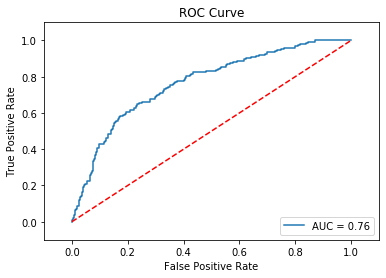

In [35]:
# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
#It either does plot show ot plot save if you wanna save the plot make sure you don't execute plt show
#plt.show()
plt.savefig('Xgboost.png', dpi=300)

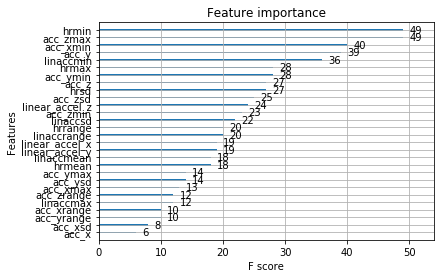

In [36]:
# plot feature importance
from xgboost import plot_importance
plot_importance(clf)
#plt.show()
plt.savefig('FeatureImportanceXgboost.png', dpi=200)

In [37]:
#Feature importance xgoost and xgboostregressor
fi = pd.DataFrame({'feature': list(X_trainups.columns),
                   'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
8,acc_zmax,0.112385
20,linear_accel_y,0.062910
17,linaccmax,0.057162
11,acc_zsd,0.045226
12,acc_xrange,0.041093
24,hrmean,0.040107
4,acc_ymin,0.039682
13,acc_yrange,0.037537
14,acc_zrange,0.036467
25,hrmin,0.035796


In [38]:
Confusion = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), 
                         index=['NO PTSD','PTSD'], 
                         columns=['NO PTSD','PTSD'])
Confusion

accuracy = accuracy_score(y_test, predictions)
accuracy

0.8527422990232908

In [40]:
Confusion

,NO PTSD,PTSD
NO PTSD,3331,509
PTSD,79,74


In [39]:
print(metrics.classification_report(y_test,predictions))


              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      3840
         1.0       0.13      0.48      0.20       153

    accuracy                           0.85      3993
   macro avg       0.55      0.68      0.56      3993
weighted avg       0.94      0.85      0.89      3993



In [41]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.inspection import partial_dependence
from sklearn.neural_network import MLPRegressor


In [42]:
from sklearn.ensemble import GradientBoostingRegressor
#model = xgboost.XGBRegressor()
model= GradientBoostingRegressor()

In [43]:
model.fit(X_trainups, y_trainups)

//miniconda3/envs/PTSD/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#####Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
clfrf= RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=10)

In [47]:
clfrf.fit(X_trainups,y_trainups)

//miniconda3/envs/PTSD/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [48]:
from sklearn import metrics


predictionsrf=clfrf.predict(X_test)

print(metrics.confusion_matrix(y_test,predictionsrf))

[[3829   11]
 [ 148    5]]


In [49]:
from sklearn.metrics import auc

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictionsrf, pos_label=2)

//miniconda3/envs/PTSD/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [50]:
y_predsrf = clfrf.predict_proba(X_test)

# take the second column because the classifier outputs scores for
# the 0 class as well
predsrf = y_predsrf[:,1]
import matplotlib.pyplot as plt

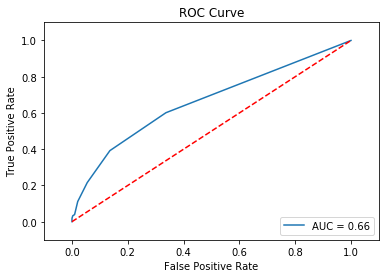

In [51]:
# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = metrics.roc_curve(y_test, predsrf)

auc_score = metrics.auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
#It either does plot show ot plot save if you wanna save the plot make sure you don't execute plt show
#plt.show()
plt.savefig('Random Forest.png', dpi=300)

In [52]:
#Feature importance xgoost and xgboostregressor
fi = pd.DataFrame({'feature': list(X_trainups.columns),
                   'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending = False)

fi1 = pd.DataFrame({'feature': list(X_trainups.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display


fi


,feature,importance
8,acc_zmax,0.112385
20,linear_accel_y,0.062910
17,linaccmax,0.057162
11,acc_zsd,0.045226
12,acc_xrange,0.041093
24,hrmean,0.040107
4,acc_ymin,0.039682
13,acc_yrange,0.037537
14,acc_zrange,0.036467
25,hrmin,0.035796


In [53]:
fi1

,feature,importance
8,acc_zmax,0.246662
25,hrmin,0.067428
20,linear_accel_y,0.053086
11,acc_zsd,0.048802
3,acc_xmin,0.045809
4,acc_ymin,0.043759
16,linaccmin,0.038394
1,acc_y,0.037462
23,hrmax,0.035529
21,linear_accel_z,0.033750


In [54]:
##Partial dependency plots

from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

//miniconda3/envs/PTSD/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)
//miniconda3/envs/PTSD/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)
//miniconda3/envs/PTSD/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.w

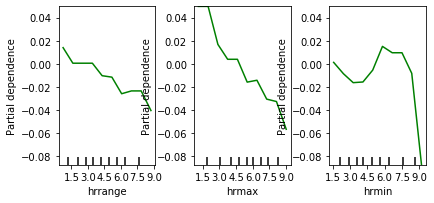

In [55]:
my_plots = plot_partial_dependence(model,       
                                   features=['hrrange', 'hrmax', 'hrmin'], # column numbers of plots we want to show
                                   X=X_trainups,            # raw predictors data.
                                   feature_names=['hrrange', 'hrmax', 'hrmin'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

In [56]:
from mlxtend.evaluate import paired_ttest_5x2cv


t, p = paired_ttest_5x2cv(estimator1=clf,
                          estimator2=clfrf,
                          X=X_trainups, y=y_trainups,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

//miniconda3/envs/PTSD/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//miniconda3/envs/PTSD/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//miniconda3/envs/PTSD/lib/python3.7/site-packages/mlxtend/evaluate/ttest.py:306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator2.fit(X_1, y_1)
//miniconda3/envs/PTSD/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

t statistic: -23.459
p value: 0.000
